# **Customer Churn Prediction** ¶


## **Problem Statement:**

Develop a predictive model to identify customers at risk of churning from an investment bank, enabling proactive retention strategies to minimize customer loss and maximize revenue growth.


## **About the Dataset**

There are 14 columns/features and 10k rows/samples.

**RowNumber**—corresponds to the record (row) number and has no effect on the output.

**CustomerId**—contains random values and has no effect on customer leaving the bank.

**Surname**—the surname of a customer has no impact on their decision to leave the bank.

**CreditScore**—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

**Geography**—a customer’s location can affect their decision to leave the bank.

**Gender**—it’s interesting to explore whether gender plays a role in a customer leaving the bank.

**Age**—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

**Tenure**—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

**Balance**—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

**NumOfProducts**—refers to the number of products that a customer has purchased through the bank.

**HasCrCard**—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

**IsActiveMember**—active customers are less likely to leave the bank.

**EstimatedSalary**—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

**Exited**—whether or not the customer left the bank.


## **KNN**

The K-Nearest Neighbors (KNN) algorithm is a simple and effective machine learning technique that classifies data points by finding the K most similar instances to a new input and voting for the target class or value.

### **The most commonly used hyperparameters for K-Nearest Neighbors (KNN) algorithm:**

n_neighbors: The number of nearest neighbors to consider when making a prediction. Increasing this number can improve the model's performance, but also increases the computation time.

weights: The weight function used to calculate the distance between samples. Supported weights are 'uniform' (all points have equal weight) and 'distance' (points closer to the query point have higher weight).

algorithm: The algorithm used to compute the nearest neighbors. Supported algorithms are 'brute' (exhaustive search), 'kd_tree' (k-d tree search), and 'ball_tree' (ball tree search).

leaf_size: The number of samples in each leaf node of the k-d tree or ball tree. Increasing this number can improve the model's performance, but also increases the computation time.

p: The power parameter for the Minkowski metric. When p=1, it is the Manhattan distance, and when p=2, it is the Euclidean distance.

metric: The distance metric used to calculate the distance between samples. Supported metrics are 'minkowski' (Minkowski distance), 'euclidean' (Euclidean distance), 'manhattan' (Manhattan distance), and 'chebyshev' (Chebyshev distance).

### **Here are some common values for these hyperparameters:**

n_neighbors: 3, 5, 10, 20

weights: 'uniform', 'distance'

algorithm: 'brute', 'kd_tree', 'ball_tree'

leaf_size: 10, 20, 30

p: 1, 2

metric: 'minkowski', 'euclidean', 'manhattan', 'chebyshev'


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score
from sklearn.svm import SVC
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import warnings
warnings.filterwarnings('ignore')



In [2]:
#from google.colab import drive

In [3]:
#drive.mount('/content/drive')

In [4]:

# Load data
data = pd.read_csv('Churn_data .csv')



In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.shape

(10000, 14)

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
# is null?
isnull = data.isnull().sum()
isnull

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
# Preprocess data
selected_features = [
    'CreditScore', 'Geography', 'Gender', 'Age',
    'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
    'IsActiveMember', 'EstimatedSalary'
]
X = data[selected_features]
y = data[['Exited']]



In [11]:
X.shape

(10000, 10)

In [12]:
# Label encoding
le = LabelEncoder()
X['Geography'] = le.fit_transform(X['Geography'])
X['Gender'] = le.fit_transform(X['Gender'])



In [13]:
# Scaling
scaler = MinMaxScaler()
X[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = scaler.fit_transform(X[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])



In [14]:
df_corr = pd.concat([X, y], axis=1)
df_corr

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,2,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,0,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,0,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,2,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,1,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0
9996,0.332,0,1,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0
9997,0.718,0,0,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1
9998,0.844,1,1,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

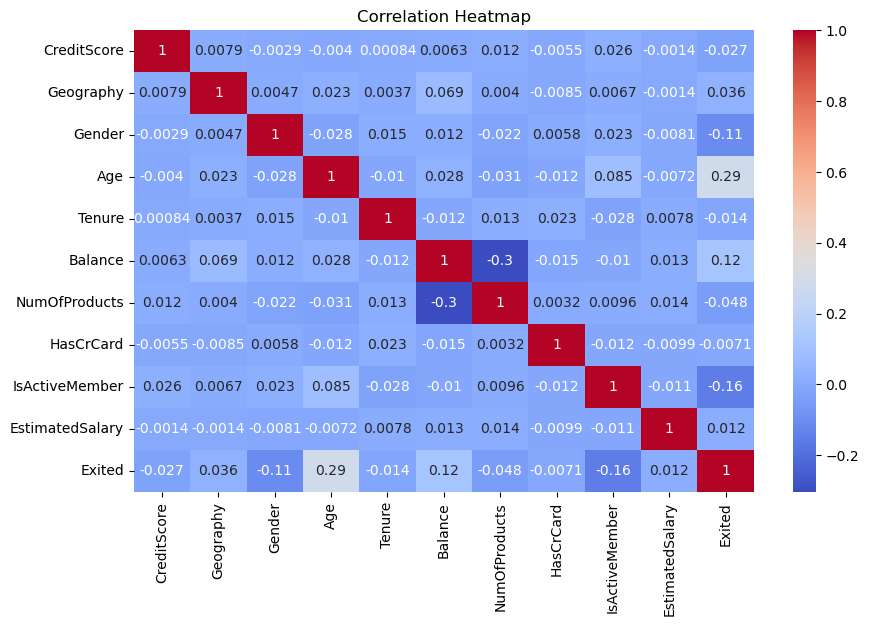

In [81]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(),annot=True, cmap='coolwarm' )
plt.title('Correlation Heatmap')
plt.show()

In [17]:
# Split data
train_X, val_X, train_y, val_y = train_test_split( X, y, random_state=0, train_size=0.8)



In [18]:
# Train model
model = KNeighborsClassifier(n_neighbors=20, metric='euclidean', weights='distance', algorithm='brute', leaf_size=50, p=2)
model.fit(train_X, train_y)



KNeighborsClassifier(algorithm='brute', leaf_size=50, metric='euclidean',
                     n_neighbors=20, weights='distance')

In [19]:
# Evaluate model
val_prediction = model.predict(val_X)
y_pred_proba = model.predict_proba(val_X)[:,1]
accuracy = accuracy_score(val_y, val_prediction)
print(f'Model accuracy: {accuracy}')



Model accuracy: 0.8245


In [20]:
print(confusion_matrix(val_y, val_prediction))
print(classification_report(val_y, val_prediction))

[[1554   41]
 [ 310   95]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1595
           1       0.70      0.23      0.35       405

    accuracy                           0.82      2000
   macro avg       0.77      0.60      0.62      2000
weighted avg       0.81      0.82      0.79      2000



In [21]:
auc = roc_auc_score(val_y, y_pred_proba)
print(auc)

0.7860242269437672


In [22]:
# Save model
joblib.dump(model, 'churn_model.pkl')

['churn_model.pkl']

A Decision Tree Classifier is a type of supervised learning algorithm in machine learning. It works by creating a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. The tree is constructed by recursively partitioning the data into subsets based on the values of the input features.

### **The most commonly used hyperparameters for Decision Tree Classifier**:

criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.

max_depth: The maximum depth of the tree. Increasing this number can improve the model's performance, but also increases the risk of overfitting.

min_samples_split: The minimum number of samples required to split an internal node. Decreasing this number can lead to overfitting, while increasing it can lead to underfitting.

min_samples_leaf: The minimum number of samples required to be at a leaf node. Decreasing this number can lead to overfitting, while increasing it can lead to underfitting.

max_features: The maximum number of features to consider at each split. Increasing this number can improve the model's performance, but also increases the computation time.

random_state: The random seed used to shuffle the data before splitting it into training and testing sets. Setting this to a fixed value ensures reproducibility of the results.

class_weight: The weight assigned to each class during training. This can be useful for imbalanced datasets, where one class has a much larger number of instances than the others.

### **Here are some common values for these hyperparameters:**

criterion: 'gini', 'entropy'

max_depth: 3, 5, 10, None (None means no limit)

min_samples_split: 2, 5, 10

min_samples_leaf: 1, 5, 10

max_features: 'auto', 'sqrt', 'log2', None (None means no limit)

random_state: 0, 42, 100

class_weight: 'balanced', 'balanced_subsample', None (None means all classes are equal)


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import numpy as np

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

clf = DecisionTreeClassifier(
    criterion="entropy",
    splitter="best",
    max_depth=10,
    min_samples_split=25,
    min_weight_fraction_leaf=0.001,
    max_features="sqrt",
    max_leaf_nodes=3,
    min_impurity_decrease=0.002,
    ccp_alpha=0.001,
    class_weight="balanced",
    random_state=42
)

# Fit on TRAIN data
clf.fit(train_X, train_y)

# Predict on TRAIN (optional: to see over/underfitting)
train_pred = clf.predict(train_X)
train_acc = accuracy_score(train_y, train_pred)
print(f"Train accuracy: {train_acc:.4f}")

# Predict on TEST — use these for confusion_matrix and report
test_pred = clf.predict(test_X)
test_acc = accuracy_score(test_y, test_pred)
print(f"Test accuracy:  {test_acc:.4f}")

print(confusion_matrix(test_y, test_pred))
print(classification_report(test_y, test_pred))


Train accuracy: 0.8293
Test accuracy:  0.8365
[[1541   66]
 [ 261  132]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.90      1607
           1       0.67      0.34      0.45       393

    accuracy                           0.84      2000
   macro avg       0.76      0.65      0.68      2000
weighted avg       0.82      0.84      0.81      2000



In [24]:
train_X, test_X, train_y, test_y = train_test_split(
    X, y, random_state=42, train_size=0.8
)


In [88]:
Dtf = DecisionTreeClassifier(
    # impurity criterion
    criterion="entropy",                
    splitter="best",                 
    # tree size / shape
    max_depth=10,                 
    min_samples_split=25,                        
    min_weight_fraction_leaf=0.001,    
    max_features="sqrt",              
    max_leaf_nodes= 3,            
    # regularisation / pruning
    min_impurity_decrease=0.002,     
    ccp_alpha=0.001, 
    # class weighting
    class_weight="balanced",              
    # randomness control
    random_state=42             
)

In [89]:
Dtf.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=3, min_impurity_decrease=0.002,
                       min_samples_split=25, min_weight_fraction_leaf=0.001,
                       random_state=42)

In [90]:

# Evaluate model
prediction = Dtf.predict(train_X)
accuracy2 = accuracy_score(train_y, prediction)
print(f'clf accuracy: {accuracy2}')
# Predict on TEST — use these for confusion_matrix and report
test_pred2 = Dtf.predict(test_X)
test_acc2 = accuracy_score(test_y, test_pred2)
print(f"Test accuracy:  {test_acc2:.4f}")

print(confusion_matrix(test_y, test_pred2))
print(classification_report(test_y, test_pred2))


clf accuracy: 0.82925
Test accuracy:  0.8365
[[1541   66]
 [ 261  132]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.90      1607
           1       0.67      0.34      0.45       393

    accuracy                           0.84      2000
   macro avg       0.76      0.65      0.68      2000
weighted avg       0.82      0.84      0.81      2000



Random Forest is a supervised learning algorithm that combines multiple decision trees to produce a more accurate and stable prediction model. It works by creating a collection of decision trees, where each tree is trained on a random subset of the training data. The final prediction is made by combining the predictions of all the trees.

### **The most commonly used hyperparameters for Random Forest Classifier:**

n_estimators: The number of trees in the forest. Increasing this number can improve the model's performance, but also increases the computation time.

criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.

max_depth: The maximum depth of each tree. Increasing this number can improve the model's performance, but also increases the risk of overfitting.

min_samples_split: The minimum number of samples required to split an internal node. Decreasing this number can lead to overfitting, while increasing it can lead to underfitting.

min_samples_leaf: The minimum number of samples required to be at a leaf node. Decreasing this number can lead to overfitting, while increasing it can lead to underfitting.

max_features: The maximum number of features to consider at each split. Increasing this number can improve the model's performance, but also increases the computation time.

max_leaf_nodes: The maximum number of leaf nodes in each tree. Increasing this number can improve the model's performance, but also increases the computation time.

min_impurity_decrease: The minimum decrease in impurity required to split an internal node. Increasing this number can lead to underfitting, while decreasing it can lead to overfitting.

bootstrap: Whether to use bootstrap sampling to build each tree. If True, each tree is built on a random subset of the training data.

oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy.

random_state: The random seed used to shuffle the data before building each tree. Setting this to a fixed value ensures reproducibility of the results.

class_weight: The weight assigned to each class during training. This can be useful for imbalanced datasets, where one class has a much larger number of instances than the others.

### **Here are some common values for these hyperparameters:**

n_estimators: 10, 50, 100, 200

criterion: 'gini', 'entropy'

max_depth: 3, 5, 10, None (None means no limit)

min_samples_split: 2, 5, 10

min_samples_leaf: 1, 5, 10

max_features: 'auto', 'sqrt', 'log2', None (None means no limit)

max_leaf_nodes: 10, 50, 100, None (None means no limit)

min_impurity_decrease: 0.0, 0.1, 0.5

bootstrap: True, False

oob_score: True, False

random_state: 0, 42, 100

class_weight: 'balanced', 'balanced_subsample', None (None means all classes are equal)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [29]:
# --- Random Forest: all major hyperparameters explicitly set ---
rf = RandomForestClassifier(
    n_estimators=500,            
    criterion="entropy",           
    max_depth=None,            
    min_samples_split=2,       
    min_samples_leaf=3,          
    min_weight_fraction_leaf=0.001,
    max_features="sqrt",         
    min_impurity_decrease=0.0,
    bootstrap=True,             
    oob_score=False,             
    n_jobs=-1,                   
    random_state=42,             
    verbose=0,
    warm_start=False,           
    class_weight=None,           
    ccp_alpha=0.001,              
             
)

# Fit & simple report (works with your existing split)



In [30]:
rf.fit(train_X, train_y)

RandomForestClassifier(ccp_alpha=0.001, criterion='entropy', min_samples_leaf=3,
                       min_weight_fraction_leaf=0.001, n_estimators=500,
                       n_jobs=-1, random_state=42)

In [31]:
# Evaluate model
train_prediction = rf.predict(train_X)
y_pred_proba = rf.predict_proba(train_X)[:,1]
accuracy = accuracy_score(train_y, train_prediction)
print(f'rf accuracy: {accuracy}')

rf accuracy: 0.87375


In [96]:

# Evaluate model
train_prediction3 = rf.predict(train_X)
accuracy3 = accuracy_score(train_y, train_prediction3)
print(f'rf accuracy: {accuracy3}')
# Predict on TEST — use these for confusion_matrix and report
test_pred3 = rf.predict(test_X)
test_acc3 = accuracy_score(test_y, test_pred3)
print(f"Test accuracy:  {test_acc3:.4f}")

print(confusion_matrix(test_y, test_pred3))
print(classification_report(test_y, test_pred3))


rf accuracy: 0.87375
Test accuracy:  0.8640
[[1556   51]
 [ 221  172]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.44      0.56       393

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000



Support Vector Machine (SVM) is a supervised learning algorithm that can be used for classification and regression tasks. It works by finding the hyperplane that maximally separates the classes in the feature space.

### **The most commonly used hyperparameters for Support Vector Machines (SVMs) are:**

C: The regularization parameter. It controls the trade-off between the margin and the misclassification error.


kernel: The kernel function used to transform the data into a higher dimensional space.


gamma: The kernel coefficient. It is used to control the spread of the kernel.
degree: The degree of the polynomial kernel.


### **Here are some common values for these hyperparameters:**

C: 1.0, 10.0, 100.0, 1000.0

kernel: 'rbf', 'linear', 'poly', 'sigmoid'

gamma: 'scale', 'auto', 0.1, 1.0, 10.0

degree: 2, 3, 4, 5


In [32]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [73]:
svm_clf = SVC(
    # decision boundary / regularization
    kernel="rbf",                 
    C=5,                       
    gamma= 10,               
    degree=5,                     
    coef0=0.0,                   
    # solver / runtime
    shrinking=True,
    tol=1e-3,
    cache_size=700,               
    max_iter=-1,                 
    verbose=False,
    # outputs / multi-class
    probability=False,           
    decision_function_shape="ovr",
    break_ties=True,             
    # data/labels
    class_weight=None,         
    random_state=42               
)

In [74]:
svm_clf.fit(train_X, train_y)

SVC(C=5, break_ties=True, cache_size=700, degree=5, gamma=10, random_state=42)

In [92]:
train_prediction = svm_clf.predict(train_X)
accuracy = accuracy_score(train_y, train_prediction)
print(f"SVM accuracy: {accuracy}")


SVM accuracy: 0.969125


In [95]:

train_prediction4 = svm_clf.predict(train_X)
accuracy4 = accuracy_score(train_y, train_prediction4)
print(f'svm_clf accuracy: {accuracy4}')
# Predict on TEST — use these for confusion_matrix and report
test_pred4 = svm_clf.predict(test_X)
test_acc4 = accuracy_score(test_y, test_pred4)
print(f"Test accuracy:  {test_acc4:.4f}")

print(confusion_matrix(test_y, test_pred4))
print(classification_report(test_y, test_pred4))

svm_clf accuracy: 0.969125
Test accuracy:  0.8140
[[1478  129]
 [ 243  150]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1607
           1       0.54      0.38      0.45       393

    accuracy                           0.81      2000
   macro avg       0.70      0.65      0.67      2000
weighted avg       0.80      0.81      0.80      2000



In [76]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Perform 5-fold cross-validation and generate predictions
y_pred_cv = cross_val_predict(svm_clf, X, y, cv=5)

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_cv))

print("\nClassification Report:")
print(classification_report(y, y_pred_cv))

print("Cross-validated Accuracy:", accuracy_score(y, y_pred_cv))

# (Optional) Get average accuracy across folds directly
scores = cross_val_score(svm_clf, X, y, cv=5, scoring='accuracy')
print("\nMean CV Accuracy: {:.3f} (+/- {:.3f})".format(scores.mean(), scores.std()))


Confusion Matrix:
[[7252  711]
 [1254  783]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      7963
           1       0.52      0.38      0.44      2037

    accuracy                           0.80     10000
   macro avg       0.69      0.65      0.66     10000
weighted avg       0.79      0.80      0.79     10000

Cross-validated Accuracy: 0.8035

Mean CV Accuracy: 0.803 (+/- 0.007)
